# Manner and Place Features of Consonants
### ECE 590SIP, 2023 October 9

1. <a href="#sec1">Downloading examples of the English consonants</a>
1. <a href="#sec2">Manner of Articulation: Glides, Nasals, Fricatives and Stops</a>
1. <a href="#sec3">The feature [sonorant]</a>
1. <a href="#sec4">The feature [continuant]</a>
1. <a href="#sec5">Mystery Word</a>
1. <a href="#sec6">Place of Articulation: Fricatives</a>


In [13]:
import librosa   # librosa can read & write sound files and spectrograms
import IPython # use this one to play waveforms in the Jupyter notebook
import numpy as np   # We use this one to do numerical operations
import urllib, io  # URLlib downloads things, io turns them into file-like objects
import matplotlib.pyplot as plt  # We use this one to plot things
%matplotlib inline 

<a name="sec1"></a>

## 1. Downloading examples of the English consonants
Now I want to talk about manner of articulation of consonants.  So let's download example audio files for all of the English consonants from wikipedia.

WARNING: the pathnames listed below are the pathnames on wikipedia as of Aug 21, 2023.  They might change in the future.  If one of the pathnames changes in the future, you will get an HTTPError, and the "except request.HTTPError" clause in the code below will print out the URL that is missing.  If that happens, you should go to https://en.wikipedia.org/wiki/International_Phonetic_Alphabet, find the phoneme that is missing, find the javascript that plays it, click the "source" link under that javascript, find the OGG filename on the page that opens up, right-click on the filename and choose "copy link address" to get the complete URL, then update just the changed part in the pathname dictionary below.

In [5]:
consonant_pathnames = {
        'w' : 'f/f2/Voiced_labio-velar_approximant',
        'r' : '3/33/Postalveolar_approximant',
        'l' : 'b/bc/Alveolar_lateral_approximant',
        'j' : 'e/e8/Palatal_approximant',
        'm' : 'a/a9/Bilabial_nasal',
        'n' : '2/29/Alveolar_nasal',
        'ŋ' : '3/39/Velar_nasal',
        'f' : '3/33/Voiceless_labiodental_fricative',
        'v' : '8/85/Voiced_labiodental_fricative',
        'θ' : '8/80/Voiceless_dental_fricative',
        'ð' : '6/6a/Voiced_dental_fricative',
        's' : 'a/ac/Voiceless_alveolar_sibilant',
        'z' : 'c/c0/Voiced_alveolar_sibilant',
        'ʃ' : 'c/cc/Voiceless_palato-alveolar_sibilant',
        'ʒ' : '3/30/Voiced_palato-alveolar_sibilant',
        'p' : '5/51/Voiceless_bilabial_plosive',
        'b' : '2/2c/Voiced_bilabial_plosive',
        't' : '0/02/Voiceless_alveolar_plosive',
        'd' : '0/01/Voiced_alveolar_plosive',
        'k' : 'e/e3/Voiceless_velar_plosive',
        'g' : '1/12/Voiced_velar_plosive_02'
}

consonant_waves = {}

for c_ipa,c_pathname in consonant_pathnames.items():
    c_url = 'https://upload.wikimedia.org/wikipedia/commons/{}.ogg'.format(c_pathname)
    try:
        req = urllib.request.urlopen(c_url)
    except urllib.request.HTTPError:
        print('Unable to download {}'.format(c_url))
    else:
        c_wav,fs = librosa.load(io.BytesIO(req.read()), sr=16000)
        consonant_waves[c_ipa] = c_wav

print('Donwnloaded these phones: {}'.format(consonant_waves.keys()))

Donwnloaded these phones: dict_keys(['w', 'r', 'l', 'j', 'm', 'n', 'ŋ', 'f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'ʒ', 'p', 'b', 't', 'd', 'k', 'g'])


In [7]:
IPython.display.Audio(consonant_waves['s'],rate=fs)

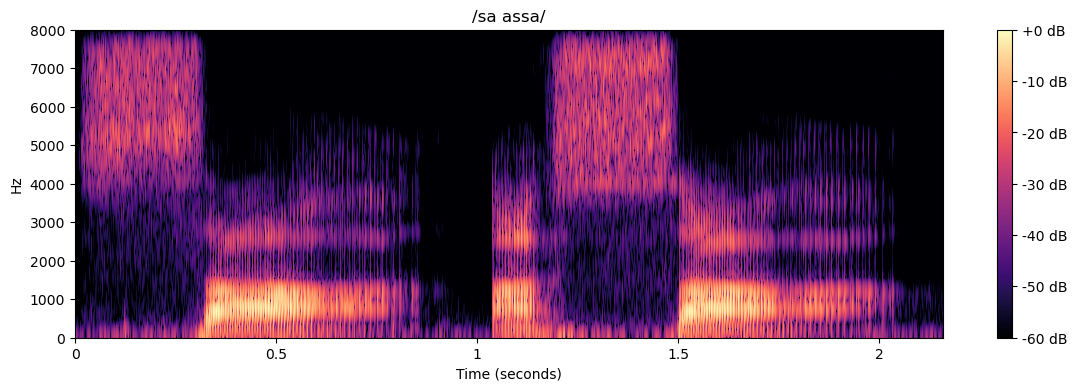

In [8]:
n_stft = librosa.stft(consonant_waves['s'],n_fft=2048,hop_length=37,win_length=75)
n_spectrogram = librosa.amplitude_to_db(np.abs(n_stft),ref=np.amax,top_db=60)

fig, ax = plt.subplots(1,1,figsize=(14,4))
img=librosa.display.specshow(n_spectrogram,sr=fs,hop_length=37,n_fft=2048,y_axis='hz',x_axis='s')
ax.set_title('/sa assa/')
fig.colorbar(img, ax=ax, format="%+2.f dB")

<a name="sec2"></a>
## 2. Manner of articulation: Glides, Nasals, Fricatives and Stops

IPA has an overly complicated definition of "manner of articulation," which leads people to the mistaken idea that speech is more complicated than non-speech.  It isn't, really. There are only four manner classes that differ in an important way.  They are:
1. Vowels and Glides are [+sonorant, +continuant]
2. Nasals are [+sonorant, -continuant]
3. Fricatives are [-sonorant, +continuant]
4. Stops, Clicks, and Silences are [-sonorant, -continuant]

Here's that same list in the form of a table:

|                       | [+sonorant] | [-sonorant]       |
|-------------------|:----------------:|:------------------:|
| [+continuant] | Vowel, Glide | Fricative         |
| [-continuant]  | Nasal            | Stop, Silence |

<a name="sec3"></a>
## 3. The feature [sonorant]
The feature [+sonorant] means that there is full-strength voicing.  Full-strength voicing happens when there is no buildup of pressure inside the vocal tract---all of the pressure drop is from below the glottis (lung pressure) to above the glottis (room pressure).   

The alternative is a [-sonorant] consonant, also known as "obstruent."  

An obstruent consonant can be voiced, but its voicing is always weaker than the corresponding sonorant.  

* [+sonorant] segments have several harmonics of the pitch, with strong energy all the way up to at least 500 or 600Hz
* [-sonorant] segments have little or no voicing.  If there is voicing, it is just the pitch frequency itself (the first harmonic) -- there is no visible second or third harmonic.


### 3.1. Example 1: /j/ vs. /ʒ/
First, let's consider the consonants /j/ (a palatal glide, as in "yacht") and /ʒ/ (a palatal voiced fricative, as in "azure").  Both are made with the tongue body raised up toward the hard palate (so we say that they have "palatal" place of articulation).  Neither has the airflow cut off entirely (i.e., both are [+continuant]), but /ʒ/ has a tighter constriction, so the air pressure between the glottis and the tongue body constriction is raised.  This raised air pressure, inside the mouth, causes voicing to have a reduced amplitude.  Even more visible in the spectrogram: (1) voicing for /ʒ/ only covers the frequency band up to about 300Hz, whereas for /j/ you can see the voiced energy up to about 800Hz, (2) for /ʒ/, you can also see frication at high frequencies around 2000Hz, whereas for /j/, the energy at around 2000Hz is still periodic voiced energy. 

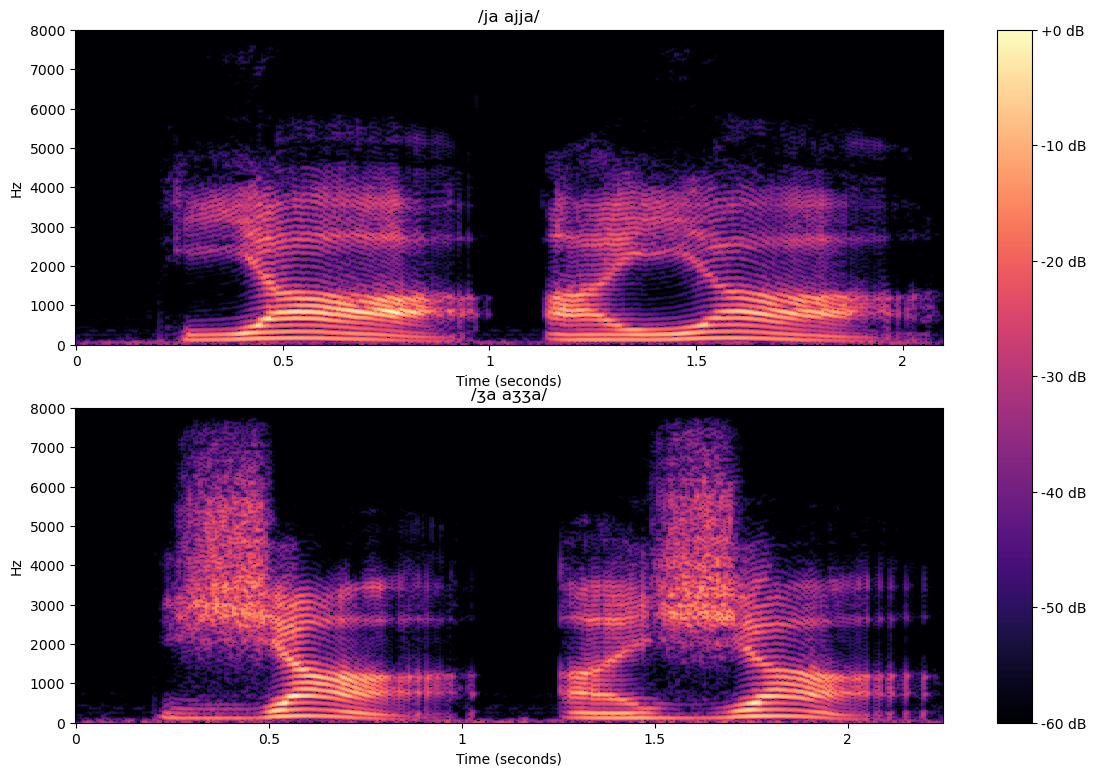

In [9]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

j_stft = librosa.stft(consonant_waves['j'],n_fft=2048,hop_length=100,win_length=400)
j_spectrogram = librosa.amplitude_to_db(np.abs(j_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(j_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/ja ajja/')

zh_stft = librosa.stft(consonant_waves['ʒ'],n_fft=2048,hop_length=100,win_length=400)
zh_spectrogram = librosa.amplitude_to_db(np.abs(zh_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(zh_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/ʒa aʒʒa/')

fig.colorbar(img, ax=ax, format="%+2.f dB")


### 3.2. Example: /w/ vs. /v/
For another example, consider the labial glide /w/, and the labial voiced fricative /v/.  These have almost the same place of articulation (or as close as you can get in English, anyway).  They are both voiced, and both [+continuant].  But /v/ has a tighter constriction, so pressure inside the vocal tract is raised, therefore it  is [-sonorant].  --- Notice from the images below that, unlike /ʒ/, the consonant /v/ actually has very little frication energy.  The main difference between /w/ and /v/ is not the frication energy, it's the bandwidth and stability of voicing --- /w/ has stable voicing with 800Hz bandwidth all the way through the closure, while the first formant of /v/ has a bandwidth of only about 300Hz, and its energy decreases toward the last half of the consonant closure.

In all fairness, this is one of the hardest comparisons on the worksheet today.  There is one auxiliary cue that's not just about the feature [sonorant], it's actually about the difference between bilabial articulation (/w/) versus labiodental articulation (/v/).  Notice that, in the vowel /a/, there are two formants at about 900Hz and 1100Hz.  For the /w/, both of those formants drop, to about 200Hz and 500Hz.  For the /v/, only the first formant drops (to about 200Hz); the second formant stays high, above 1000Hz.  That's the difference between bilabial versus labiodental articulation; it has nothing at all to do with the feature [sonorant].

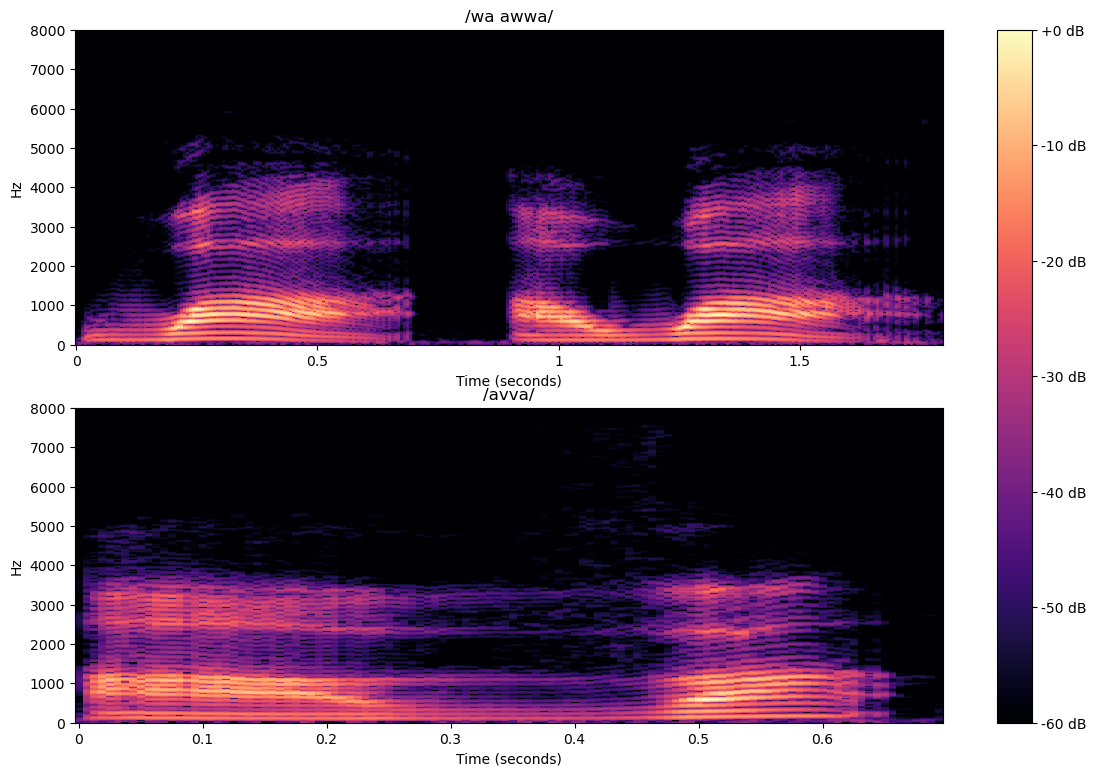

In [10]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

w_stft = librosa.stft(consonant_waves['w'],n_fft=2048,hop_length=100,win_length=400)
w_spectrogram = librosa.amplitude_to_db(np.abs(w_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(w_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/wa awwa/')

v_stft = librosa.stft(consonant_waves['v'],n_fft=2048,hop_length=100,win_length=400)
v_spectrogram = librosa.amplitude_to_db(np.abs(v_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(v_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/avva/')

fig.colorbar(img, ax=ax, format="%+2.f dB")


### 3.3. Example: /m/ vs. /b/
Now consider the nasal consonant /m/ and the stop consonant /b/.  Both are voiced, both are made with the lips.  Both are made with a complete closure of the vocal tract, so they're [-continuant].  But when the lips close on /m/, the velum is open, so that air can escape through the nose, and therefore pressure never builds up inside the vocal tract.  For this reason /m/ is [+sonorant], but /b/ is [-sonorant].

In comparing /ama/ versus /aba/, notice that there's a difference in the bandwidth of voicing, but both of them are a little narrower than they would be for /awa/ and /ava/.  In /ama/, voicing has a bandwidth of around 500Hz; in /aba/, it has a bandwidth of around 200Hz.   The /ama/ closure also shows energy at the higher formant frequencies ---- these are actually the so-called "nasal formants," i.e., they are the resonant frequencies of the mouth and nose together, not just of the mouth.   The nasal formants are much lower in energy than the corresponding vowel formants.  Their frequencies are much more predictable than vowel formants: (1) the frequency doesn't change as the tongue move, it stays at the same frequency all the way through closure, (2) almost everybody has their second nasal formant at 1000Hz, their third at 1900Hz, and their fourth nasal formant at 2500Hz.  Vowel formants are higher in energy, but less predictable in frequency.

In comparing /ma/ versus /ba/ (at the beginning of each spectrogram), notice that there is a long sonorant voiced region corresponding to the /m/.  For the /b/, there's nothing but silence until the lips release.

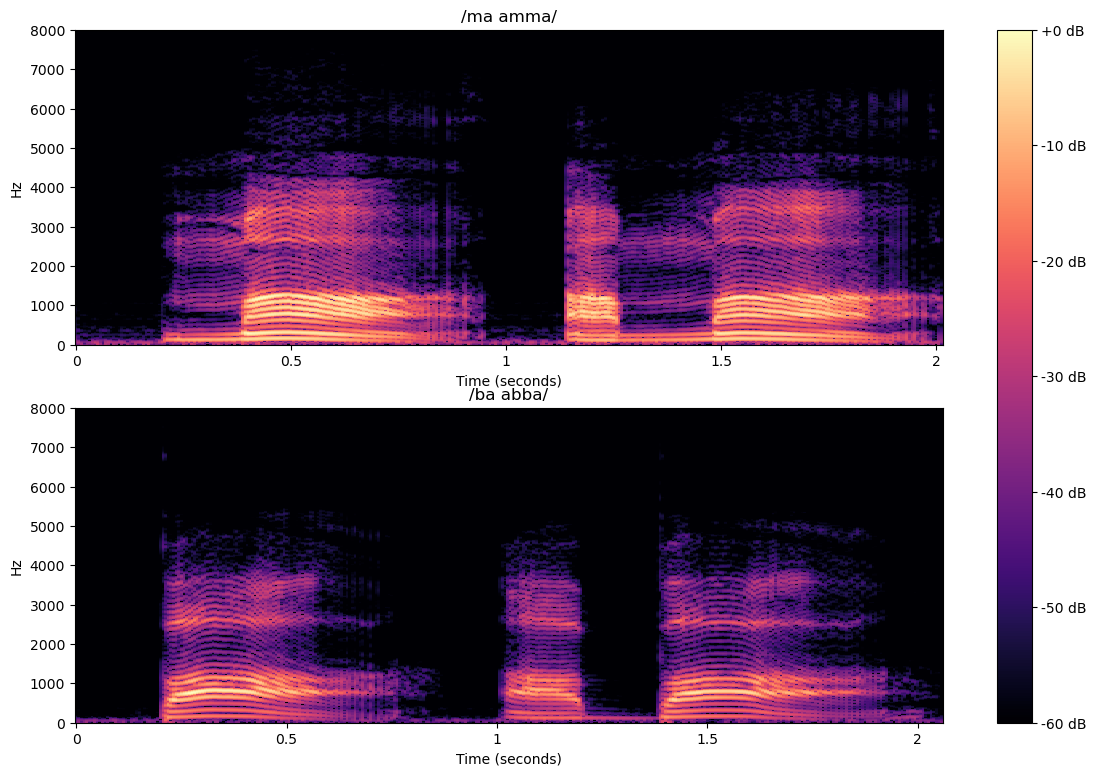

In [11]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

m_stft = librosa.stft(consonant_waves['m'],n_fft=2048,hop_length=100,win_length=400)
m_spectrogram = librosa.amplitude_to_db(np.abs(m_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(m_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/ma amma/')

b_stft = librosa.stft(consonant_waves['b'],n_fft=2048,hop_length=100,win_length=400)
b_spectrogram = librosa.amplitude_to_db(np.abs(b_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(b_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/ba abba/')

fig.colorbar(img, ax=ax, format="%+2.f dB")


### 3.4. Example: /n/ vs. /d/
Now let's consider the nasal consonant /n/ versus the voiced stop /d/.  Both of these are alveolar place of articulation, meaning they are made with the tongue tip pushed against the alveolar ridge -- the bony ridge about 1cm behind the teeth.

Notice that the nasal formants are at almost the same frequencies for /n/ as they were for /m/.  The stability of nasal consonants is their defining attribute.

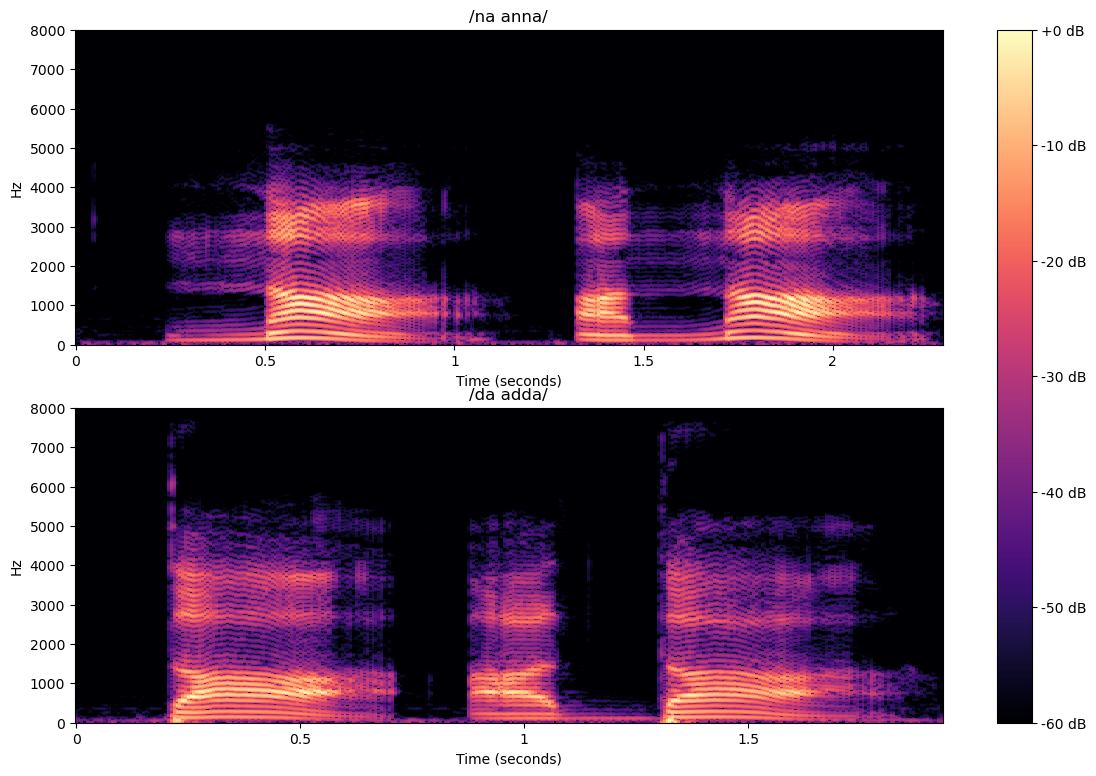

In [12]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

n_stft = librosa.stft(consonant_waves['n'],n_fft=2048,hop_length=100,win_length=400)
n_spectrogram = librosa.amplitude_to_db(np.abs(n_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(n_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/na anna/')

d_stft = librosa.stft(consonant_waves['d'],n_fft=2048,hop_length=100,win_length=400)
d_spectrogram = librosa.amplitude_to_db(np.abs(d_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(d_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/da adda/')

fig.colorbar(img, ax=ax, format="%+2.f dB")


<a name="sec4"></a>
## 4. The feature [continuant]

A continuant sound (feature value [+continuant]) is one for which air flow continues to flow through the mouth.  A discontinuant sound (feature value [-continuant]) is one for which the mouth is completely obstructed.

The defining acoustic feature of a discontinuant sound is a sharp discontinuity along the time axis, at the instant of consonant closure, and another sharp discontinuity at the instant of consonant release.

* For [-continuant], all energy above 1kHz should **suddenly** cut off.  If there is a gradual tapering off, then it is [+continuant].
* The key feature is the **sudden cutoff of most energy above 1kHz**.  Energy below 1kHz can leak through passages other than the mouth (e.g., the nose), but any significant energy above 1kHz must be coming from the mouth somehow. 

### 4.1. Example: /w/ versus /m/
The two bilabial sonorant consonants /w/ versus /m/ are distinguished only by the feature [continuant]: /w/ is [+continuant], while /m/ is [-continuant]. 

Notice that /m/ has a sharp discontinuity when the lips are closed or released, whereas /w/ has a much more gradual glide.

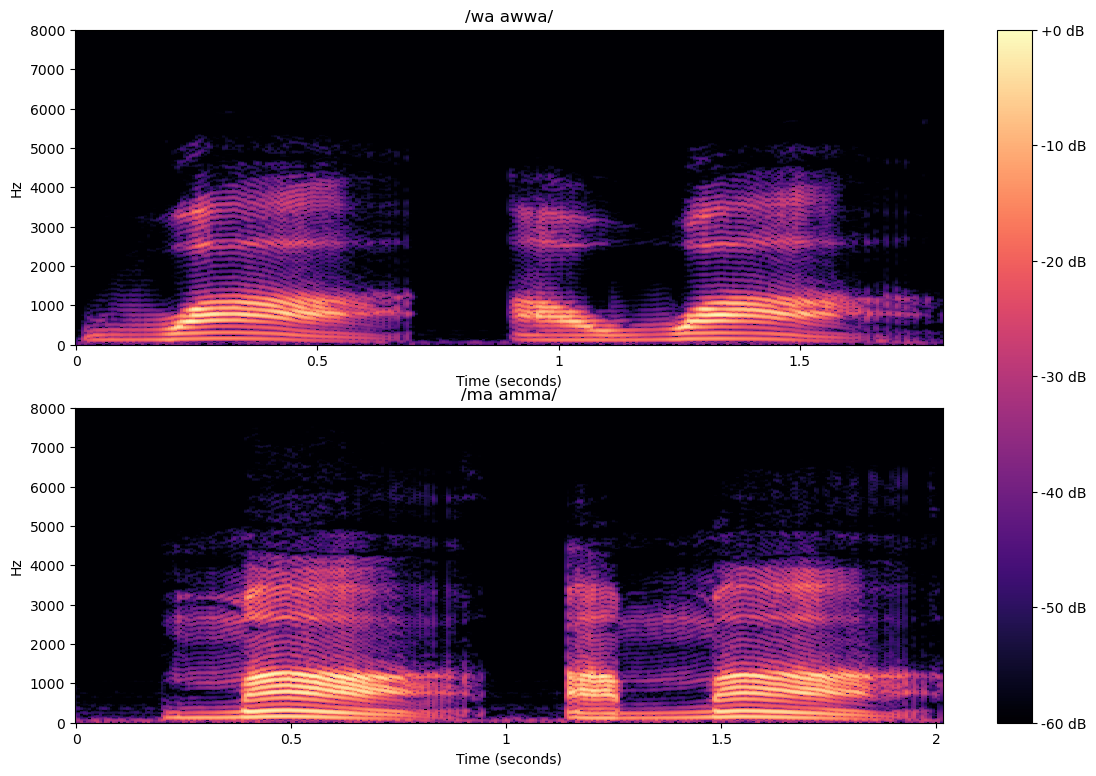

In [14]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

img=librosa.display.specshow(w_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/wa awwa/')

img=librosa.display.specshow(m_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/ma amma/')

fig.colorbar(img, ax=ax, format="%+2.f dB")

### 4.2. Example: /j/ versus /ŋ/
Now consider the tongue body glide /j/ versus the tongue body nasal consonant /ŋ/.  The glide /j/ is always made with the tongue body pushed forward against the hard palate (palatal place of articulation); the nasal /ŋ/ can be made with the tongue body pushed forward (palatal) or backward (velar), both productions are considered the same sound in English.

Notice, again, the difference in the abruptness of the discontinuity.  It looks kind of like, in /ŋa/, the energy of the formant "jumps up" at release, from the low energy of the nasal consonant to the high energy of the vowel.  In /ja/, by contrast, the formants have their high vowel-like energy even during the tightest consonant constriction; the main change from consonant to vowel is the frequency of the formant, with only a subtle change in its energy.

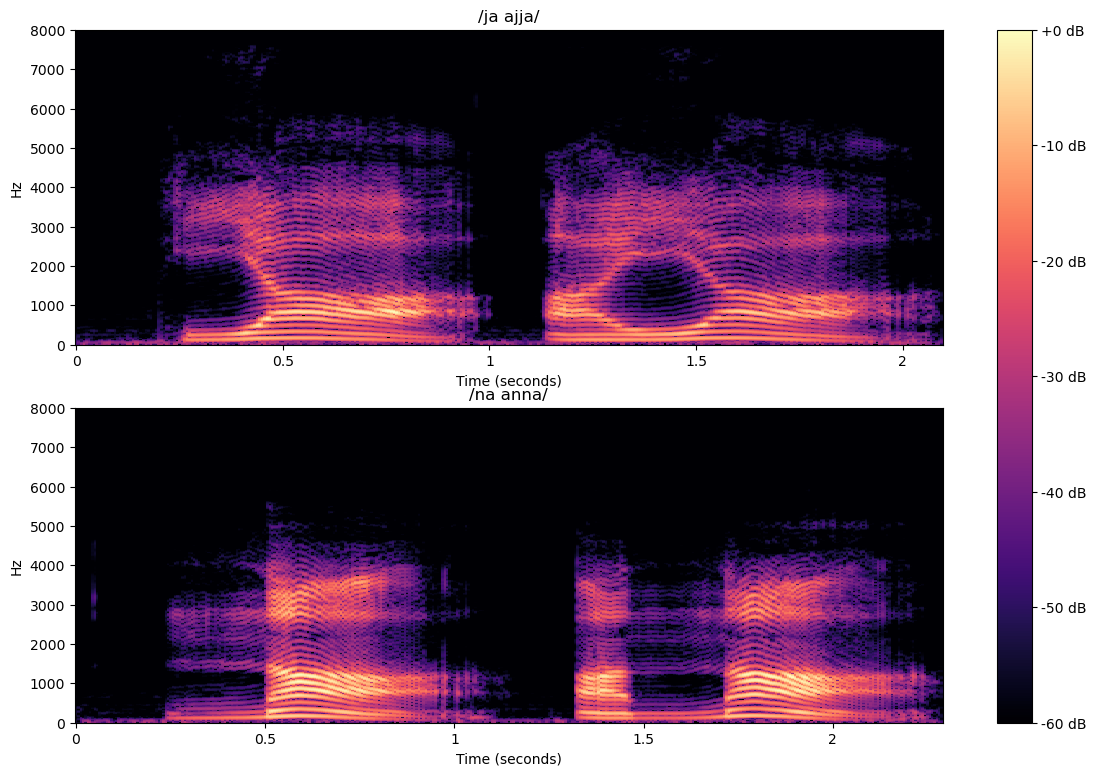

In [15]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

img=librosa.display.specshow(j_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/ja ajja/')

img=librosa.display.specshow(n_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/na anna/')

fig.colorbar(img, ax=ax, format="%+2.f dB")

### 4.3 Example: /s/ versus /t/
Consider the fricative /s/ versus the stop consonant /t/.  Both are unvoiced (feature [-voice]), made with the tongue tip against the alveolar ridge.  The fricative is [+continuant], meaning that air continues to flow all during the consonant closure: in this case, the airflow is evidenced by lots and lots of frication energy during closure.

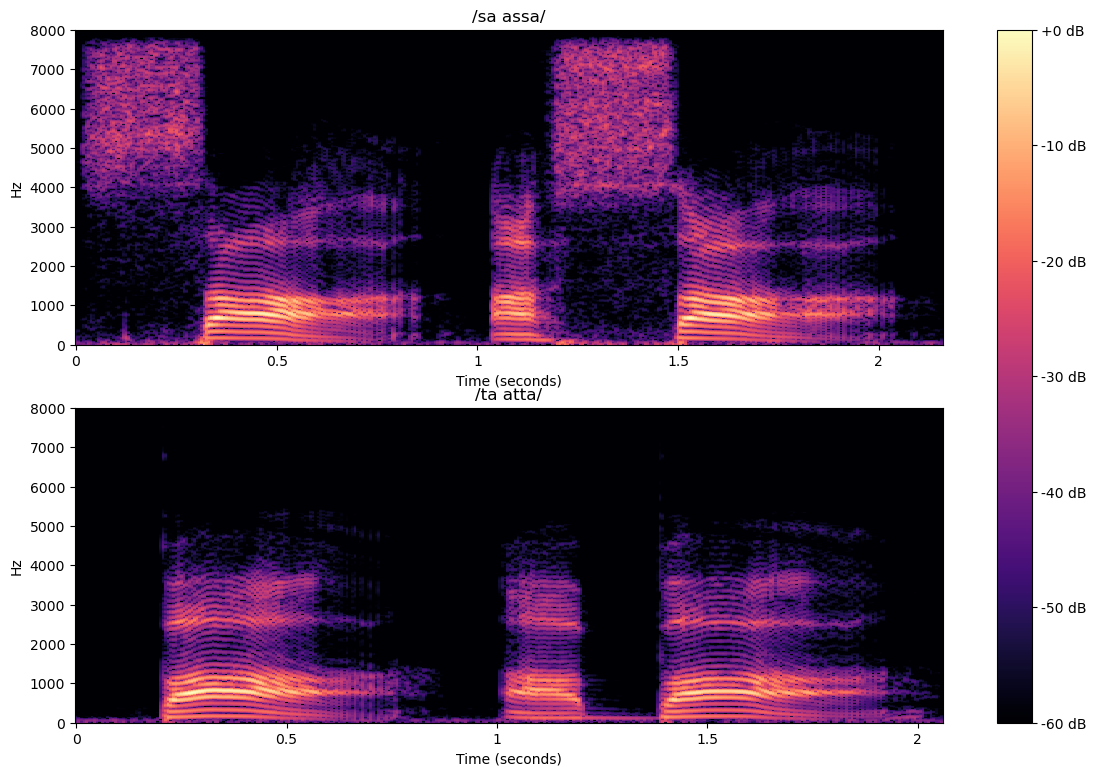

In [16]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

s_stft = librosa.stft(consonant_waves['s'],n_fft=2048,hop_length=100,win_length=400)
s_spectrogram = librosa.amplitude_to_db(np.abs(s_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(s_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/sa assa/')

t_stft = librosa.stft(consonant_waves['t'],n_fft=2048,hop_length=100,win_length=400)
t_spectrogram = librosa.amplitude_to_db(np.abs(t_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(b_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/ta atta/')

fig.colorbar(img, ax=ax, format="%+2.f dB")

### 4.4 Example: /ð/ versus /d/
Finally, consider the voiced fricative /ð/ versus the voiced stop /d/.  Both are made with the tongue tip.  The fricative /ð/ is called "dental" because it's made with the tongue touching the teeth, or even between the teeth.  The stop /d/ is called "alveolar" because the tongue usually doesn't touch the teeth, it's usually touching the alveolar ridge behind the teeth.

The fricatives /ð/ and /v/ have less frication energy, during closure, than any other fricatives in English (notice, in fact, how much /aða/ looks like /ava/).  

Nevertheless, you can see the difference between the [+continuant] sound /ð/ versus the [-continuant] sound /d/, based on the amount of discontinuity at the consonant release and closure.  (Notice, for example, how much /da/ looks like /ba/: no energy at all until the tongue tip release).

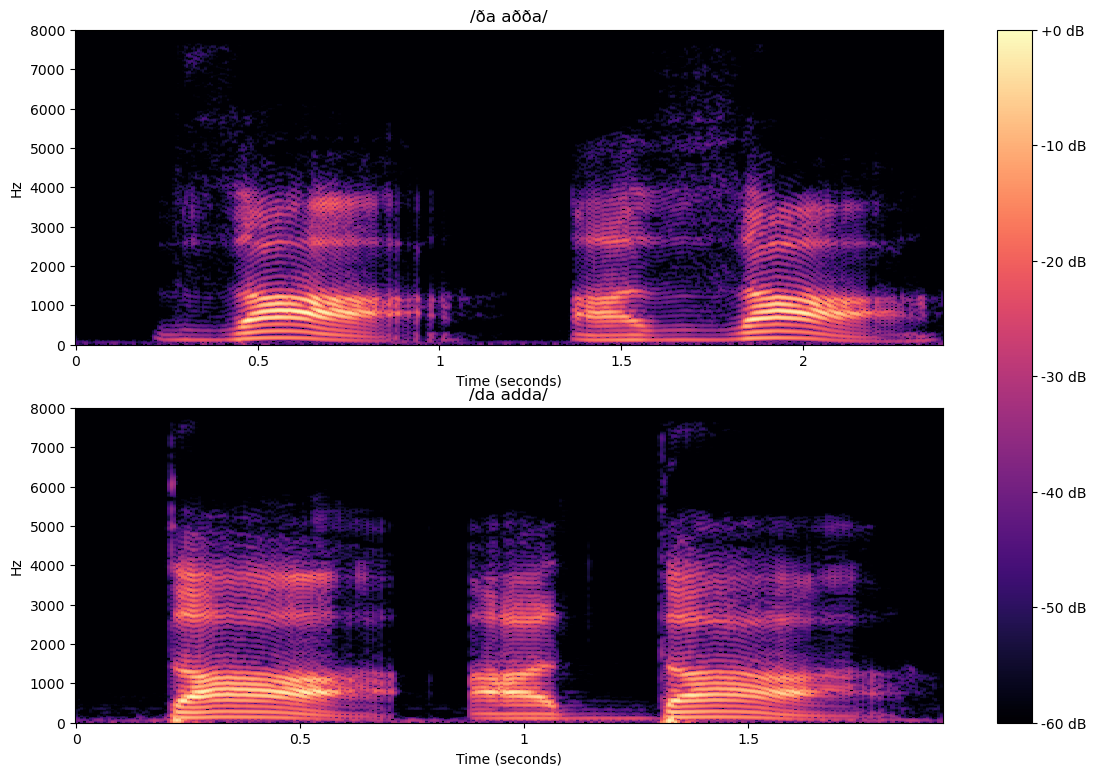

In [17]:
fig, ax = plt.subplots(2,1,figsize=(14,9))

dh_stft = librosa.stft(consonant_waves['ð'],n_fft=2048,hop_length=100,win_length=400)
dh_spectrogram = librosa.amplitude_to_db(np.abs(dh_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(dh_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[0])
ax[0].set_title('/ða aðða/')

d_stft = librosa.stft(consonant_waves['d'],n_fft=2048,hop_length=100,win_length=400)
d_spectrogram = librosa.amplitude_to_db(np.abs(d_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(d_spectrogram,sr=fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax[1])
ax[1].set_title('/da adda/')

fig.colorbar(img, ax=ax, format="%+2.f dB")

<a name="sec5"></a>
## 5. Mystery word
The following file contains one word of English.  What word is it?

Hint: it has
* 3 syllables
* Each syllable is a consonant followed by a vowel
* So the whole word has the structure CVCVCV
* What is the **manner** of the first consonant? The second? The third?
* Can you think of any words with that structure?

In [28]:
x_url = 'http://courses.engr.illinois.edu/ece590sip/sp2018/mystery1.ogg'
try:
    req = urllib.request.urlopen(x_url)
except urllib.request.HTTPError:
    print('Unable to download {}'.format(x_url))
else:
    x_wav,x_fs = librosa.load(io.BytesIO(req.read()), sr=16000)

print('Donwnloaded the mystery word')

Donwnloaded the mystery word


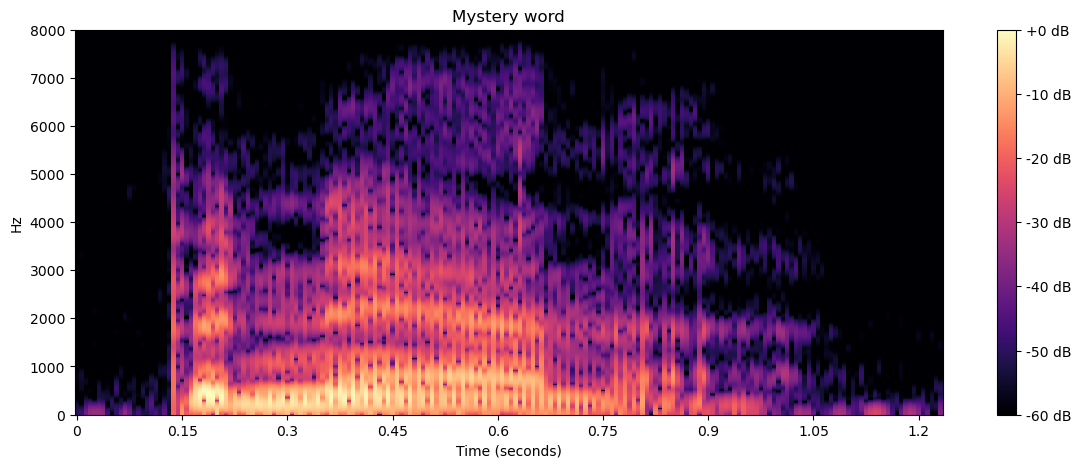

In [29]:
fig, ax = plt.subplots(1,1,figsize=(14,5))

x_stft = librosa.stft(x_wav,n_fft=2048,hop_length=int(0.003*x_fs),win_length=int(0.006*x_fs))
x_spectrogram = librosa.amplitude_to_db(np.abs(x_stft),ref=np.amax,top_db=60)
img=librosa.display.specshow(x_spectrogram,sr=x_fs,hop_length=100,n_fft=2048,y_axis='hz',x_axis='s',ax=ax)
ax.set_title('Mystery word')

fig.colorbar(img, ax=ax, format="%+2.f dB")

<a name="sec6"></a>
## 6. Place Features: Fricatives


Unvoiced fricatives are produced when (1) a tight constriction is made somewhere in the vocal tract, tight enough to generate turbulence, and (2) the glottis is opened up, to allow airflow without voicing.  

The excitation signal, $e[n]$, is caused by turbulence, which is generated at the constriction, and hits against obstacles downstream from the constriction.  A very good signal model for turbulence is a sequence of independent, identically distributed Gaussian samples.  We sometimes write $e[n]\sim{\mathcal N}(0,1)$ to mean that each sample, $e[n]$, is drawn independently from a normal (Gaussian) distribution with zero mean and unit variance.



In [30]:
import soundfile as sf
import io
import urllib.request as request
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import scipy.fftpack as fftpack

In [31]:
fs = 44100
e = stats.multivariate_normal.rvs(size=int(0.5*fs))
print(e.shape)
sf.write('whitenoise.wav',e,fs)
E = fftpack.fft(e)

(22050,)


Text(0, 0.5, 'Spectral Power')

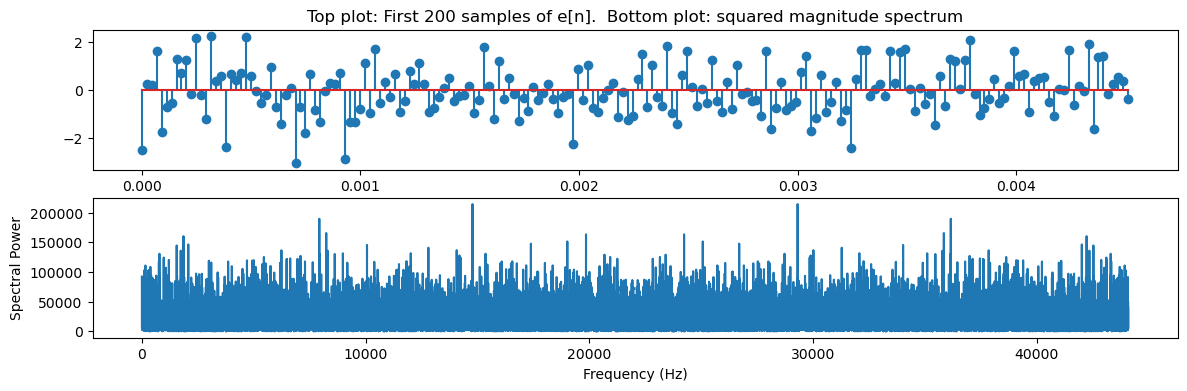

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(211)
t_axis = np.linspace(0,0.5,len(e))
plt.stem(t_axis[0:200],e[0:200])
plt.title('Top plot: First 200 samples of e[n].  Bottom plot: squared magnitude spectrum')
plt.subplot(212)
f_axis = np.linspace(0,fs,len(E))
plt.plot(f_axis,np.square(np.absolute(E)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Power')

The bottom plot, above, illustrates an important point about noise: if the signal is noise, then the spectrum is also noise.

Notice, though, that the spectrum is all positive.  That's because we squared it.  We can find the VARIANCE of the noise, as a function of FREQUENCY, by (1) chopping the signal into a lot of frames, (2) taking the squared-magnitude-Fourier-transform of each frame, (3) average across frames, and (4) divide by the frame length to get the average spectrum per sample.  This computation is called "Welch's method."  It gives us the average spectrum of the fricative, which is often a very useful thing to know.  

The scipy.signal.welch function does this for us.  If we give it the sampling frequency fs, it will give us a matching frequency axis.  It will also scale the spectrum, so that the value at each frequency is the average power per Hertz --- in the spectrum below, notice that the average power per Hertz is 1/8000, because the power of the signal is variance=1, and the bandwidth of the signal is fs/2=8000.

Text(0, 0.5, 'Power per Hertz')

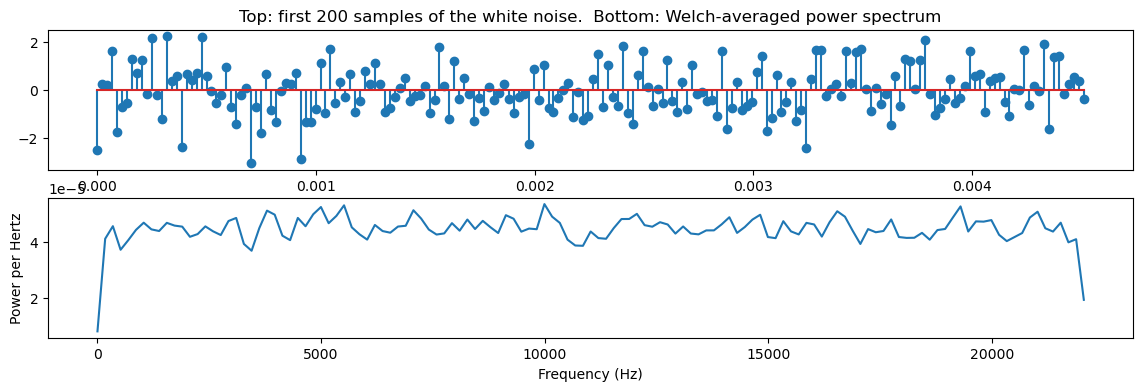

In [39]:
import scipy.signal
(f_welch,E_welch) = scipy.signal.welch(e,fs=fs)
plt.figure(figsize=(14,4))
plt.subplot(211)
plt.stem(t_axis[0:200],e[0:200])
plt.title('Top: first 200 samples of the white noise.  Bottom: Welch-averaged power spectrum')
plt.subplot(212)
plt.plot(f_welch,E_welch)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power per Hertz')

### 6.b. Filtering = Front cavity, in front of the constriction
Here's a cutaway picture of the vocal tract, from https://en.wikipedia.org/wiki/Alveolar_consonant.  Numbers on the bottom indicate the articulators.  Numbers on the top indicate the places of articulation.

<img src="http://courses.engr.illinois.edu/ece590sip/sp2018/placesofarticulation.png" />

#### Articulator (the thing that moves)
* 2 = Lips (labial)
* 17 = Tip (apical)
* 16 =  Blade (laminar)
* 15,14 = Body (dorsal)
* 13 = Root (radical)

#### Place of Articulation (the thing it touches)
* 2 = Labial
* 3 = Dental 
* 4 = Alveolar
* 5 = Post-alveolar
* 6 = Pre-palatal
* 7 = Palatal
* 8 = Velar
* 9 = Uvular
* 10 = Pharyngeal
* 11 = Glottal

<img src="http://courses.engr.illinois.edu/ece590sip/sp2018/tube_open.png" />

The figure above shows the vocal tract flipped around, with the fricative constriction (closed) at the left, and the lips (open) at the right.

* At the lips, air pressure is almost zero---it's only a tiny fluctuation around atmospheric pressure, which is almost constant.  This means that most of the air pressure wave reaching the lips, $p_{forward}(x_{lips},t)$ has to be reflected backward with a negative sign.  Let's arbitrarily define "most of" to mean 80 percent:

$$p_{backward}\left(x_{lips},t\right) = - 0.80 p_{forward}\left(x_{lips},t\right)$$

* When that backward wave hits the fricative constriction, most of it can't go through.  So it is reflected forward again, without changing sign.

$$p_{forward}\left(x_{constriction},t\right) = 0.80 p_{backward}\left(x_{constriction},t\right)$$

* In between those two places, there is a delay equal to the length of the cavity, divided by the speed of sound ($c=35,400$cm/s, at body temperature).

$$p_{forward}\left(x_{lips},t\right) = p_{forward}\left(x_{constriction},t-\frac{L}{c}\right)$$

$$p_{backward}\left(x_{constriction},t\right) = p_{backward}\left(x_{lips},t-\frac{L}{c}\right)$$

If you put it all together, you discover that the signal is subtracted from itself, with a delay of $2L/c$.

$$x\left[n\right] = e\left[n\right] - 0.64 x\left[n-\frac{2LF_s}{c}\right]$$

So let's filter the signal in exactly that way.

In [40]:
# tubelength should be the tube length in centimeters
def quarterwaveresonator(excitation,tubelength,fs):
    outputsignal = np.zeros(len(excitation))
    speedofsound=35400
    delayinseconds = 2.0*tubelength/speedofsound
    delayinsamples = max(1,int(delayinseconds*fs))
    print('For tubelength={}cm, fs={}Hz: delay in seconds is {}, delay in samples is {}'.format(tubelength,fs,delayinseconds,delayinsamples))
    for n in range(0,len(outputsignal)):
        if n < delayinsamples:
            outputsignal[n] = excitation[n]
        else:        
            outputsignal[n] = excitation[n] - 0.8*outputsignal[n-delayinsamples]
    # renormalize to unit power
    power = np.average(np.square(outputsignal))
    return(outputsignal/np.sqrt(power))

Try the following with these different lengths:
* L=0.25cm -- labiodental fricative, /f/
* L=0.5cm -- dental fricative, /$\theta$/
* L=1.5cm -- alveolar fricative, /s/
* L=3cm -- post-alveolar fricative, /ʃ/
* L=7cm -- velar fricative, /x/
* L=9cm -- uvular fricative, /X/
* L=13cm -- pharyngeal fricative, /ħ/
* L=18cm -- glottal fricative, /h/

In [44]:
L = 1.5
x = quarterwaveresonator(e,L,fs)
IPython.display.Audio(x,rate=fs)

For tubelength=1.5cm, fs=44100Hz: delay in seconds is 8.474576271186441e-05, delay in samples is 3


Text(0, 0.5, 'Spectral Power')

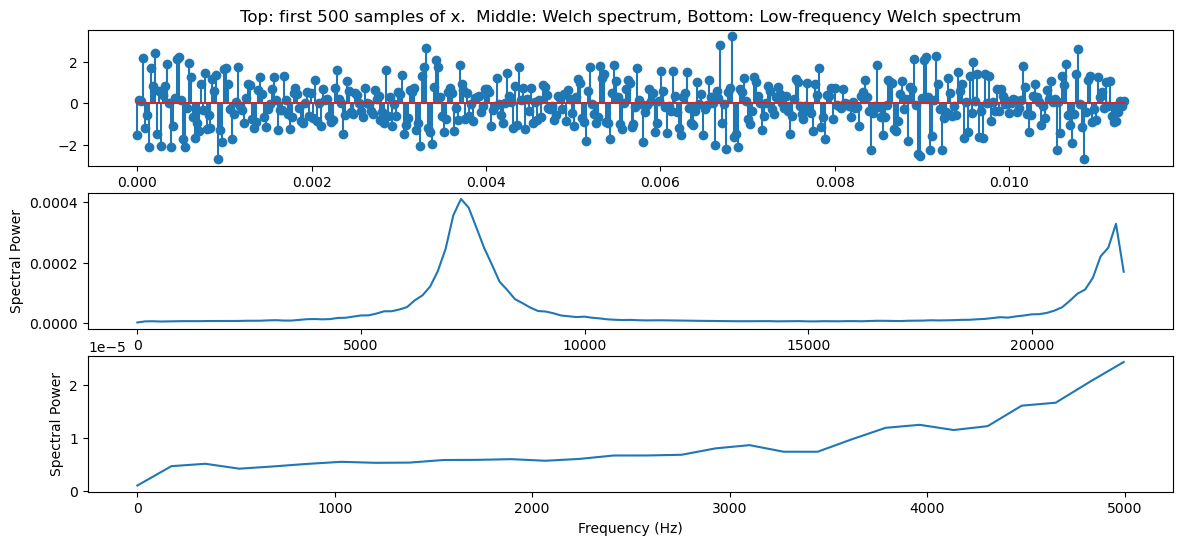

In [45]:
plt.figure(figsize=(14,6))
plt.subplot(311)
plt.stem(t_axis[0:500],x[0:500])
plt.title('Top: first 500 samples of x.  Middle: Welch spectrum, Bottom: Low-frequency Welch spectrum')
plt.subplot(312)
(f_welch,X_welch) = scipy.signal.welch(x,fs=fs)
plt.plot(f_welch,X_welch)
plt.ylabel('Spectral Power')
plt.subplot(313)
f_lowfreq = f_welch[np.where(f_welch < 5000)]
X_lowfreq = X_welch[np.where(f_welch < 5000)]
plt.plot(f_lowfreq,X_lowfreq)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Power')

#### Why "quarter wave resonator"?

Notice that the spectrum above has peaks at the frequencies

$$F_n = \frac{c}{4L} + (n-1)\frac{c}{2L}$$

These are the resonant frequencies of a uniform tube of length $L$.  If the uniform tube is from glottis to lips, we would call these "formants"; if the uniform tube is just the cavity in front of the fricative constriction, we call these "front cavity resonances".

Since the wavelength of a sound is $\lambda = c/F_n$, these resonances correspond to waves where the tube length, $L$, is $(\lambda/4)$, $3\lambda/4$, and so on:

$$L = \frac{2n+1}{4} \lambda_n$$

Thus, we call a tube like this (open at one end, closed at the other) a "quarter-wave resonator."

Let's download examples from wikipedia, and create spectrograms, to see what they look like.  You should be able to see the quarter-wave resonance for every fricative except /$\theta$/ and /f/; those two have resonances that are too high, so their spectra just look flat.

In [49]:
import io
consonant_pathnames = {
    'f' : '3/33/Voiceless_labiodental_fricative',
    'v' : '8/85/Voiced_labiodental_fricative',
    'θ' : '8/80/Voiceless_dental_fricative',
    'ð' : '6/6a/Voiced_dental_fricative',
    's' : 'a/ac/Voiceless_alveolar_sibilant',
    'z' : 'c/c0/Voiced_alveolar_sibilant',
    'ʃ' : 'c/cc/Voiceless_palato-alveolar_sibilant',
    'ʒ' : '3/30/Voiced_palato-alveolar_sibilant',
    'ɕ' : '0/0b/Voiceless_alveolo-palatal_sibilant',
    'ʑ' : '1/15/Voiced_alveolo-palatal_sibilant',
    'x' : '0/0f/Voiceless_velar_fricative',
    'ɣ' : '4/47/Voiced_velar_fricative',
   'X' : 'c/c8/Voiceless_uvular_fricative',
    'ʁ' : 'a/af/Voiced_uvular_fricative',
    'ħ' : 'b/b2/Voiceless_pharyngeal_fricative',
    'ʕ' : 'c/cd/Voiced_pharyngeal_fricative',
    'h' : 'd/da/Voiceless_glottal_fricative',
    'ɦ' : 'e/e2/Voiced_glottal_fricative',
    'ɬ' : 'e/ea/Voiceless_alveolar_lateral_fricative'
}
        
consonant_waves = {}
import os
import os.path
if not os.path.exists('wikisounds'):
    os.mkdir('wikisounds')

for c_ipa,c_pathname in consonant_pathnames.items():
    c_url = 'https://upload.wikimedia.org/wikipedia/commons/{}.ogg'.format(c_pathname)
    try:
        req = urllib.request.urlopen(c_url)
    except urllib.request.HTTPError:
        print('Unable to download {}'.format(c_url))
    else:
        c_wav,c_fs = librosa.load(io.BytesIO(req.read()),sr=16000)
        c_filename = 'wikisounds/' + c_ipa + '.wav'
        sf.write(c_filename,c_wav,c_fs)
        consonant_waves[c_ipa] = c_wav

print('Donwnloaded these phones: {}'.format(consonant_waves.keys()))

Donwnloaded these phones: dict_keys(['f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'ʒ', 'ɕ', 'ʑ', 'x', 'ɣ', 'X', 'ʁ', 'ħ', 'ʕ', 'h', 'ɦ', 'ɬ'])


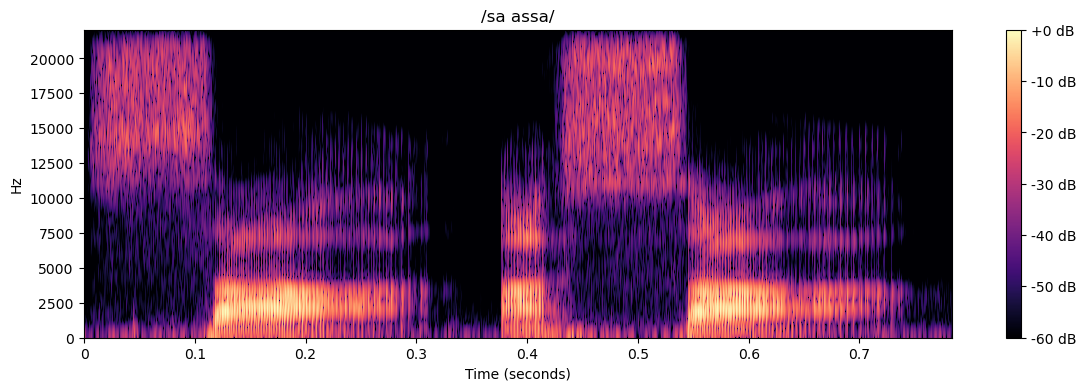

In [50]:
n_stft = librosa.stft(consonant_waves['s'],n_fft=2048,hop_length=37,win_length=75)
n_spectrogram = librosa.amplitude_to_db(np.abs(n_stft),ref=np.amax,top_db=60)

fig, ax = plt.subplots(1,1,figsize=(14,4))
img=librosa.display.specshow(n_spectrogram,sr=fs,hop_length=37,n_fft=2048,y_axis='hz',x_axis='s')
ax.set_title('/sa assa/')
fig.colorbar(img, ax=ax, format="%+2.f dB")